In [1]:
import pandas as pd
import numpy as np
from itertools import product
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_pickle('./Data_Generation/df_pickle/question-context-20-emb.pkl')

In [3]:
raw_data

,index,context,question,question_embedding,context_embedding
0,0,How can we build intelligent machines? More t...,What was the subject of Alan Turing's famous e...,"[tensor(-0.0308), tensor(-0.0802), tensor(-0.3...","[tensor(0.0259), tensor(-0.1784), tensor(-0.19..."
1,1,How can we build intelligent machines? More t...,How did Alan Turing suggest we approach the qu...,"[tensor(0.0078), tensor(-0.1214), tensor(-0.32...","[tensor(0.0259), tensor(-0.1784), tensor(-0.19..."
2,2,How can we build intelligent machines? More t...,What did Alan Turing propose as an alternative...,"[tensor(-0.1040), tensor(-0.2294), tensor(-0.3...","[tensor(0.0259), tensor(-0.1784), tensor(-0.19..."
3,3,How can we build intelligent machines? More t...,What did Turing suggest we should do instead o...,"[tensor(0.0062), tensor(-0.0955), tensor(-0.22...","[tensor(0.0259), tensor(-0.1784), tensor(-0.19..."
4,4,How can we build intelligent machines? More t...,How did Turing propose we should build a human...,"[tensor(-0.0133), tensor(-0.1910), tensor(-0.2...","[tensor(0.0259), tensor(-0.1784), tensor(-0.19..."
...,...,...,...,...,...
3195,15,Our third measure of cluster similarity is ba...,What is the Gaussian mixture-model used for?,"[tensor(-0.1037), tensor(-0.5570), tensor(-0.2...","[tensor(-0.1904), tensor(-0.9128), tensor(-0.1..."
3196,16,Our third measure of cluster similarity is ba...,What is the EM algorithm used for in the conte...,"[tensor(7.8840e-05), tensor(-0.7687), tensor(-...","[tensor(-0.1904), tensor(-0.9128), tensor(-0.1..."
3197,17,Our third measure of cluster similarity is ba...,Who is credited with first using mixture model...,"[tensor(0.1196), tensor(-0.2591), tensor(-0.30...","[tensor(-0.1904), tensor(-0.9128), tensor(-0.1..."
3198,18,Our third measure of cluster similarity is ba...,When was the EM algorithm first named?,"[tensor(0.1602), tensor(-0.6306), tensor(-0.31...","[tensor(-0.1904), tensor(-0.9128), tensor(-0.1..."


In [4]:
df = pd.DataFrame( [{"question": tuple([row['question'], row['question_embedding']]) , "context": tuple([row['context'], row['context_embedding']] )} for _, row in raw_data.iterrows()])

In [5]:

# create a sample dataframe
#raw_data = pd.DataFrame({'question': ['What is your name?', 'What is your age?',"what is 2+3","what is 2+3",3],
#                   'context': ['My name is Stephen Hawking.', 'I am 76 years old.',5,"the number 5",3]})


# Assuming you have a DataFrame called df with 4 columns 'question' 'answer' and embeddings for both
questions = df['question'].unique()
answers = df['context'].unique()

# Create a dictionary with question-answer pairs as keys and 1 as the value and also add their embeddings
original_pairs = {(row['question'], row['context']): 1 for _, row in df.iterrows()}
# Generate all possible combinations and check if they are in the original_pairs dictionary and add their embeddings which should not be the product of the embeddings of the question and answer
df = pd.DataFrame([(q, c, original_pairs.get((q, c,), 0)) for q, c in product(questions, answers)], columns=['question', 'context', 'label'])

In [6]:
df

,question,context,label
0,(What was the subject of Alan Turing's famous ...,( How can we build intelligent machines? More ...,1
1,(What was the subject of Alan Turing's famous ...,( Machine learning is the implementation of Tu...,0
2,(What was the subject of Alan Turing's famous ...,( Data mining refers to the discovery of patte...,0
3,(What was the subject of Alan Turing's famous ...,( Artificial intelligence is the construction ...,0
4,(What was the subject of Alan Turing's famous ...,( Machine learning draws on a number of discip...,0
...,...,...,...
506395,(What is the goal of density estimation and ho...,(10.1.3 Cross-validation for quantifying gener...,0
506396,(What is the goal of density estimation and ho...,(10.1.4 Cross-validation for model selection W...,0
506397,(What is the goal of density estimation and ho...,(10.1.5 Two-layer cross-validation Let’s turn ...,0
506398,(What is the goal of density estimation and ho...,(The Apriori algorithm is very efficient at id...,0


In [7]:
test_q = np.random.choice(df['question'].unique(), size = int(len(df['question'].unique())*0.20), replace = False)
# also for the context
test_c = np.random.choice(df['context'].unique(), size = int(len(df['context'].unique())*0.20), replace = False)

In [8]:
test = df[df['question'].isin(test_q)]
train = df[~df['question'].isin(test_q)]
test_ctx = df[df['question'].isin(test_q)].loc[df['context'].isin(test_c)]
train_ctx = df[~df['question'].isin(test_q)].loc[~df['context'].isin(test_c)]
# Resample the training data to have equal number of positive and negative samples
train_resample = pd.concat([train[train['label'] == 1].sample(len(train[train['label'] == 0]), replace = True), train[train['label'] == 0]])

In [9]:
train = train.sample(frac=1).reset_index(drop=True)
train_ctx = train_ctx.sample(frac=1).reset_index(drop=True)
train_resample = train_resample.sample(frac=1).reset_index(drop=True)

In [10]:
train

,question,context,label
0,(What is the difference between a learning cur...,"( In forward selection, we first consider a mo...",0
1,(What are the variables introduced in the exam...,"( In one dimension, the normal distribution wi...",0
2,"(How is this approach similar to PCA?, [tensor...",( We can select λ similar to how we selected K...,0
3,(What is the basis for the two spaces shown in...,( Some machine-learning terminology such as su...,0
4,"(How is the ""total mass"" of a component k defi...",( The normal distribution gave us a distributi...,0
...,...,...,...
405115,(Which linkage function is able to find the ri...,"(As presented, the KNN classifier is simply a ...",0
405116,(What is the optimal selection of features for...,"( Sometimes, the mutual information is normali...",0
405117,(What role does model validation play in testi...,( To summarize the rules of probability: A pro...,0
405118,(How does logistic regression correspond to a ...,"( Consider two distinct observations i, j. To ...",0


In [11]:
train['label'].value_counts()

0    402559
1      2561
Name: label, dtype: int64

In [12]:
test['label'].value_counts()

0    100643
1       637
Name: label, dtype: int64

In [13]:
train['question'].value_counts()

(What is the difference between a learning curve and a generalization error?, [tensor(-0.2233), tensor(-0.2030), tensor(-0.2161), tensor(-0.1628), tensor(0.1257), tensor(-0.1643), tensor(0.0801), tensor(-0.0417), tensor(0.0822), tensor(0.2226), tensor(0.4184), tensor(0.1001), tensor(-0.2000), tensor(0.0268), tensor(-0.1205), tensor(-0.4763), tensor(0.1833), tensor(-0.0246), tensor(0.1978), tensor(-0.1799), tensor(0.0065), tensor(-0.0426), tensor(0.0353), tensor(0.2439), tensor(-0.2481), tensor(-0.2389), tensor(0.1251), tensor(-0.1581), tensor(0.1473), tensor(-0.1147), tensor(0.0072), tensor(-0.4855), tensor(0.1951), tensor(0.2110), tensor(-0.0001), tensor(-0.2496), tensor(0.1605), tensor(0.0007), tensor(-0.0142), tensor(0.0939), tensor(0.0832), tensor(-0.0877), tensor(0.1250), tensor(-0.0362), tensor(0.1712), tensor(-0.2242), tensor(-0.0675), tensor(-0.2060), tensor(0.2437), tensor(0.0424), tensor(0.3081), tensor(-0.4196), tensor(0.0857), tensor(-0.1641), tensor(0.2570), tensor(-0.4514

In [14]:
test['question'].value_counts()

(How did Turing propose we should build a human-imitating machine?, [tensor(-0.0133), tensor(-0.1910), tensor(-0.2350), tensor(-0.2471), tensor(-0.1111), tensor(-0.2383), tensor(0.2327), tensor(0.2494), tensor(0.0397), tensor(0.3720), tensor(0.1292), tensor(0.2618), tensor(-0.0738), tensor(-0.1449), tensor(0.3796), tensor(-0.1913), tensor(0.1255), tensor(0.2913), tensor(-0.2024), tensor(-0.1943), tensor(0.0378), tensor(0.0077), tensor(0.1209), tensor(-0.0099), tensor(0.0981), tensor(0.1590), tensor(-0.2339), tensor(0.0187), tensor(-0.0804), tensor(0.1343), tensor(-0.4373), tensor(-0.0539), tensor(-0.2482), tensor(0.1525), tensor(-0.0001), tensor(-0.1245), tensor(0.1942), tensor(0.1529), tensor(-0.0987), tensor(-0.1535), tensor(0.5953), tensor(0.0803), tensor(0.0050), tensor(-0.0102), tensor(-0.0237), tensor(0.2228), tensor(0.3204), tensor(-0.1338), tensor(0.1895), tensor(0.1351), tensor(0.2798), tensor(0.0580), tensor(0.1960), tensor(-0.1609), tensor(0.0425), tensor(-0.0177), tensor(0.

In [15]:
len(train['context'].value_counts())

160

In [16]:
len(test['context'].value_counts())

160

In [17]:
train.to_pickle('./Data_Generation/df_pickle/train.pkl')
train_resample.to_pickle('./Data_Generation/df_pickle/train_resample.pkl')
test.to_pickle('./Data_Generation/df_pickle/test.pkl')

In [18]:
train

,question,context,label
0,(What is the difference between a learning cur...,"( In forward selection, we first consider a mo...",0
1,(What are the variables introduced in the exam...,"( In one dimension, the normal distribution wi...",0
2,"(How is this approach similar to PCA?, [tensor...",( We can select λ similar to how we selected K...,0
3,(What is the basis for the two spaces shown in...,( Some machine-learning terminology such as su...,0
4,"(How is the ""total mass"" of a component k defi...",( The normal distribution gave us a distributi...,0
...,...,...,...
405115,(Which linkage function is able to find the ri...,"(As presented, the KNN classifier is simply a ...",0
405116,(What is the optimal selection of features for...,"( Sometimes, the mutual information is normali...",0
405117,(What role does model validation play in testi...,( To summarize the rules of probability: A pro...,0
405118,(How does logistic regression correspond to a ...,"( Consider two distinct observations i, j. To ...",0


Neural Net

In [19]:
from keras.models import Sequential
from keras.layers import Dense
import keras.metrics as metrics

In [20]:
neural_net = Sequential()
neural_net.add(Dense(256, input_dim=768*2, activation='relu'))
neural_net.add(Dense(256, activation='relu'))
neural_net.add(Dense(1, activation='sigmoid'))

neural_net.compile(loss='binary_crossentropy', optimizer='adam', metrics=[metrics.TruePositives(name='tp'),
      metrics.FalsePositives(name='fp'),
      metrics.TrueNegatives(name='tn'),
      metrics.FalseNegatives(name='fn'),
      metrics.BinaryAccuracy(name='accuracy'),
      metrics.Precision(name='precision'),
      metrics.Recall(name='recall'),
      metrics.AUC(name='auc'),
      metrics.AUC(name='prc', curve='PR')])

neural_net_ctx = Sequential()
neural_net_ctx.add(Dense(256, input_dim=768*2, activation='relu'))
neural_net_ctx.add(Dense(256, activation='relu'))
neural_net_ctx.add(Dense(1, activation='sigmoid'))

neural_net_ctx.compile(loss='binary_crossentropy', optimizer='adam', metrics=[metrics.TruePositives(name='tp'),
      metrics.FalsePositives(name='fp'),
      metrics.TrueNegatives(name='tn'),
      metrics.FalseNegatives(name='fn'),
      metrics.BinaryAccuracy(name='accuracy'),
      metrics.Precision(name='precision'),
      metrics.Recall(name='recall'),
      metrics.AUC(name='auc'),
      metrics.AUC(name='prc', curve='PR')])

neural_net_resample = Sequential()
neural_net_resample.add(Dense(256, input_dim=768*2, activation='relu'))
neural_net_resample.add(Dense(256, activation='relu'))
neural_net_resample.add(Dense(1, activation='sigmoid'))

neural_net_resample.compile(loss='binary_crossentropy', optimizer='adam', metrics=[metrics.TruePositives(name='tp'),
      metrics.FalsePositives(name='fp'),
      metrics.TrueNegatives(name='tn'),
      metrics.FalseNegatives(name='fn'),
      metrics.BinaryAccuracy(name='accuracy'),
      metrics.Precision(name='precision'),
      metrics.Recall(name='recall'),
      metrics.AUC(name='auc'),
      metrics.AUC(name='prc', curve='PR')])




In [21]:
#Select the second element of the tuple which is the embedding:
X_train_q = np.asarray([np.array(x[1]) for x in train['question']])
X_train_c = np.asarray([np.array(x[1]) for x in train['context']])

X_train_ctx_q = np.asarray([np.array(x[1]) for x in train_ctx['question']])
X_train_ctx_c = np.asarray([np.array(x[1]) for x in train_ctx['context']])

X_train_resample_q = np.asarray([np.array(x[1]) for x in train_resample['question']])
X_train_resample_c = np.asarray([np.array(x[1]) for x in train_resample['context']])

In [22]:
X_train = np.concatenate((X_train_q, X_train_c), axis=1)
X_train_ctx = np.concatenate((X_train_ctx_q, X_train_ctx_c), axis=1)
X_train_resample = np.concatenate((X_train_resample_q, X_train_resample_c), axis=1)

In [23]:
X_test_q = np.asarray([np.array(x[1]) for x in test['question']])
X_test_c = np.asarray([np.array(x[1]) for x in test['context']])

X_test_ctx_q = np.asarray([np.array(x[1]) for x in test_ctx['question']])
X_test_ctx_c = np.asarray([np.array(x[1]) for x in test_ctx['context']])

In [24]:
X_test_ctx = np.concatenate((X_test_ctx_q, X_test_ctx_c), axis=1)
X_test = np.concatenate((X_test_q, X_test_c), axis=1)


In [25]:
y_train = train['label'].values
y_test = test['label'].values

y_train_ctx = train_ctx['label'].values
y_test_ctx = test_ctx['label'].values

y_train_resample = train_resample['label'].values


In [26]:
# Save to npz
np.savez('./Data_Generation/df_pickle/TEST_TRAIN_DATA/train.npz', X_train=X_train, y_train=y_train)
np.savez('./Data_Generation/df_pickle/TEST_TRAIN_DATA/train_resample.npz', X_train_resample=X_train_resample, y_train_resample=y_train_resample)
np.savez('./Data_Generation/df_pickle/TEST_TRAIN_DATA/test.npz', X_test=X_test, y_test=y_test)

In [27]:
baseline_history = neural_net.fit(X_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/10
3165/3165 [==============================] - 32s 10ms/step - loss: 0.0357 - tp: 2.0000 - fp: 109.0000 - tn: 402450.0000 - fn: 2559.0000 - accuracy: 0.9934 - precision: 0.0180 - recall: 7.8094e-04 - auc: 0.7200 - prc: 0.0278 - val_loss: 0.0294 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 100643.0000 - val_fn: 637.0000 - val_accuracy: 0.9937 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8572 - val_prc: 0.0942
Epoch 2/10
3165/3165 [==============================] - 26s 8ms/step - loss: 0.0275 - tp: 5.0000 - fp: 2.0000 - tn: 402557.0000 - fn: 2556.0000 - accuracy: 0.9937 - precision: 0.7143 - recall: 0.0020 - auc: 0.8927 - prc: 0.1258 - val_loss: 0.0258 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 100643.0000 - val_fn: 637.0000 - val_accuracy: 0.9937 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.9044 - val_prc: 0.1844
Epoch 3/10
3165/3165 [==============================] - 25s 8ms/step - loss: 0.0241 - tp: 75.0000 - fp: 44.00

In [28]:
baseline_history_ctx = neural_net_ctx.fit(X_train_ctx, y_train_ctx,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(X_test_ctx, y_test_ctx))

Epoch 1/10
2532/2532 [==============================] - 24s 9ms/step - loss: 0.0366 - tp: 1.0000 - fp: 9.0000 - tn: 322027.0000 - fn: 2059.0000 - accuracy: 0.9936 - precision: 0.1000 - recall: 4.8544e-04 - auc: 0.7016 - prc: 0.0208 - val_loss: 0.0348 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 20117.0000 - val_fn: 139.0000 - val_accuracy: 0.9931 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8354 - val_prc: 0.0469
Epoch 2/10
2532/2532 [==============================] - 20s 8ms/step - loss: 0.0280 - tp: 3.0000 - fp: 2.0000 - tn: 322034.0000 - fn: 2057.0000 - accuracy: 0.9936 - precision: 0.6000 - recall: 0.0015 - auc: 0.8873 - prc: 0.1230 - val_loss: 0.0329 - val_tp: 0.0000e+00 - val_fp: 1.0000 - val_tn: 20116.0000 - val_fn: 139.0000 - val_accuracy: 0.9931 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8494 - val_prc: 0.0645
Epoch 3/10
2532/2532 [==============================] - 19s 8ms/step - loss: 0.0240 - tp: 65.0000 - fp: 40.0000 - tn: 

In [29]:
baseline_history_resample = neural_net_resample.fit(X_train_resample, y_train_resample,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/10
6290/6290 [==============================] - 59s 9ms/step - loss: 0.0737 - tp: 396380.0000 - fp: 14442.0000 - tn: 388117.0000 - fn: 6179.0000 - accuracy: 0.9744 - precision: 0.9648 - recall: 0.9847 - auc: 0.9950 - prc: 0.9928 - val_loss: 0.0538 - val_tp: 431.0000 - val_fp: 1371.0000 - val_tn: 99272.0000 - val_fn: 206.0000 - val_accuracy: 0.9844 - val_precision: 0.2392 - val_recall: 0.6766 - val_auc: 0.9174 - val_prc: 0.3402
Epoch 2/10
6290/6290 [==============================] - 51s 8ms/step - loss: 0.0238 - tp: 401241.0000 - fp: 4087.0000 - tn: 398472.0000 - fn: 1318.0000 - accuracy: 0.9933 - precision: 0.9899 - recall: 0.9967 - auc: 0.9988 - prc: 0.9980 - val_loss: 0.0456 - val_tp: 391.0000 - val_fp: 733.0000 - val_tn: 99910.0000 - val_fn: 246.0000 - val_accuracy: 0.9903 - val_precision: 0.3479 - val_recall: 0.6138 - val_auc: 0.8795 - val_prc: 0.4071
Epoch 3/10
6290/6290 [==============================] - 50s 8ms/step - loss: 0.0157 - tp: 401635.0000 - fp: 2619.0000 - tn: 

In [30]:
def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
              linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

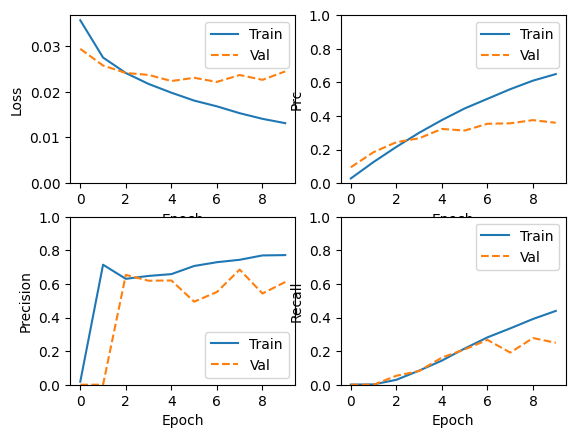

In [31]:
plot_metrics(baseline_history)

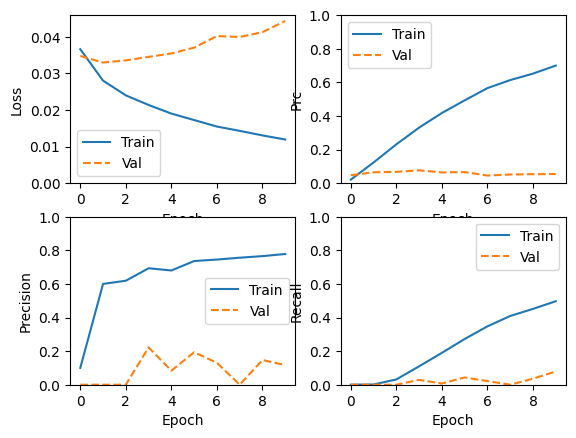

In [32]:
plot_metrics(baseline_history_ctx)

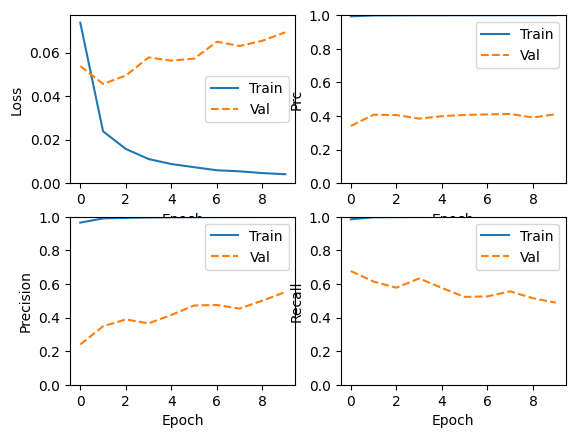

In [33]:
plot_metrics(baseline_history_resample)

Cosine Similarity classifier.

In [34]:
# Make a neural network which simply uses the cosine similarity between the question and the answer as the prediction
def cos_sim(x, y):
    return np.dot(x, y)/(np.linalg.norm(x)*np.linalg.norm(y))



In [35]:
from sklearn.metrics import auc, roc_curve
y_pred_keras = neural_net.predict(X_test).ravel()
y_pred_keras_ctx = neural_net_ctx.predict(X_test_ctx).ravel()
y_pred_keras_resample = neural_net_resample.predict(X_test).ravel()


fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
fpr_keras_ctx, tpr_keras_ctx, thresholds_keras_ctx = roc_curve(y_test_ctx, y_pred_keras_ctx)
fpr_keras_resample, tpr_keras_resample, thresholds_keras_resample = roc_curve(y_test, y_pred_keras_resample)


auc_keras = auc(fpr_keras, tpr_keras)
auc_keras_ctx = auc(fpr_keras_ctx, tpr_keras_ctx)
auc_keras_resample = auc(fpr_keras_resample, tpr_keras_resample)

3165/3165 [==============================] - 5s 2ms/step


In [36]:

y_pred_cos = np.asarray([cos_sim(x, y) for x, y in zip(X_test_q, X_test_c)])
# normalize the cosine similarity to be between 0 and 1
fpr_cos, tpr_cos, thresholds_cos = roc_curve(y_test, y_pred_cos)
auc_cos = auc(fpr_cos, tpr_cos)

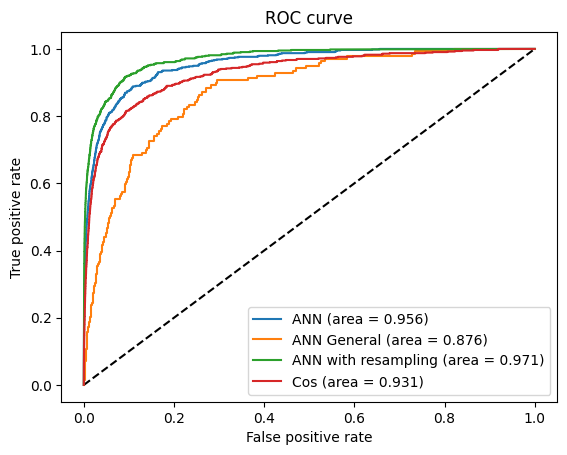

In [37]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='ANN (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_keras_ctx, tpr_keras_ctx, label='ANN General (area = {:.3f})'.format(auc_keras_ctx))
plt.plot(fpr_keras_resample, tpr_keras_resample, label='ANN with resampling (area = {:.3f})'.format(auc_keras_resample))
plt.plot(fpr_cos, tpr_cos, label='Cos (area = {:.3f})'.format(auc_cos))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [96]:
batch_size = 128 * 8

In [108]:
import tensorflow as tf


class WeightedCosineSimilarity(tf.keras.layers.Layer):

    def __init__(self, units = batch_size, activation=None):
        '''Initializes the class and sets up the internal variables'''

        super(WeightedCosineSimilarity, self).__init__()
        self.units = units
        self.activation = tf.keras.activations.get(activation)

    def build(self, input_shape):
        '''Create the state of the layer (weights)'''
        # W should be half the size of the input and should be ones
        w_init = tf.ones_initializer()
        w_init_val = w_init(shape=(self.units, (int(input_shape[-1] / 2))), dtype='float32')
        self.w = tf.Variable(initial_value=w_init_val, trainable='true')



    def call(self, inputs):
        '''Defines the computation from inputs to outputs'''
        # Take the first half of the input which is U:
        U = inputs[:, :int(inputs.shape[-1] / 2)]
        # Take the second half of the input which is V:
        V = inputs[:, int(inputs.shape[-1] / 2):]

        # Compute the element wise product of U, V and W
        UW = tf.multiply(U, self.w)
        # Compute the multiplication of UW and V
        WUV = tf.multiply(UW, V)
        # Sum the result over the second axis
        WUV = tf.reduce_sum(WUV, axis=1)
        # Square U and V
        U_squared = tf.square(U)
        V_squared = tf.square(V)
        # Compute the element wise product of U_squared, V_squared and W
        WU_squared = tf.multiply(U_squared, self.w)
        WV_squared = tf.multiply(V_squared, self.w)
        # take the root of the sum of squares of WUV, WU_squared and WV_squared
        WU_squared_root = tf.sqrt(WU_squared)
        WV_squared_root = tf.sqrt(WV_squared)

        denominator = tf.multiply(WU_squared_root, WV_squared_root)

        # Sum the result over the second axis
        denominator = tf.reduce_sum(denominator, axis=1)

        # Add a small value to the denominator to avoid division by zero
        denominator = tf.add(denominator, 0.000001)

        # divide WUV by the denominator
        WUV_div_denominator = tf.divide(WUV, denominator)

        return self.activation(WUV_div_denominator)

x = tf.convert_to_tensor(X_train_resample[:batch_size])
y = tf.convert_to_tensor(y_train_resample[:batch_size])
model0 = WeightedCosineSimilarity()
model0.build(x.shape)
model0.call(x)


<tf.Tensor: shape=(1024,), dtype=float32, numpy=
array([0.65630174, 0.48735037, 0.8003524 , ..., 0.8175713 , 0.4726806 ,
       0.7343837 ], dtype=float32)>

In [109]:
X_train.shape

(405120, 1536)

In [110]:
model_cos = tf.keras.models.Sequential([
    WeightedCosineSimilarity(batch_size)
])


In [111]:
model_cos.compile(loss=tf.keras.losses.MeanSquaredError(),
        optimizer=tf.keras.optimizers.Adam(0.001, clipnorm=1.),
        metrics=[metrics.TruePositives(name='tp'),
      metrics.FalsePositives(name='fp'),
      metrics.TrueNegatives(name='tn'),
      metrics.FalseNegatives(name='fn'),
      metrics.BinaryAccuracy(name='accuracy'),
      metrics.Precision(name='precision'),
      metrics.Recall(name='recall'),
      metrics.AUC(name='auc'),
      metrics.AUC(name='prc', curve='PR')])

In [112]:
baseline_history_cos = model_cos.fit(X_train_resample[0:len(y_train_resample)-len(y_train_resample)%batch_size], y_train_resample[0:len(y_train_resample)-len(y_train_resample)%batch_size],
          batch_size=batch_size,
          epochs=3,
          verbose=1,
          validation_data=(X_test[0:len(y_test)-len(y_test)%batch_size], y_test[0:len(y_test)-len(y_test)%batch_size]))

Epoch 1/3
786/786 [==============================] - 22s 27ms/step - loss: 0.1848 - tp: 392740.0000 - fp: 250466.0000 - tn: 151965.0000 - fn: 9693.0000 - accuracy: 0.6768 - precision: 0.6106 - recall: 0.9759 - auc: 0.9226 - prc: 0.9297 - val_loss: 0.2590 - val_tp: 610.0000 - val_fp: 49349.0000 - val_tn: 50372.0000 - val_fn: 21.0000 - val_accuracy: 0.5080 - val_precision: 0.0122 - val_recall: 0.9667 - val_auc: 0.9330 - val_prc: 0.2475
Epoch 2/3
786/786 [==============================] - 20s 25ms/step - loss: 0.1657 - tp: 379753.0000 - fp: 154777.0000 - tn: 247654.0000 - fn: 22680.0000 - accuracy: 0.7795 - precision: 0.7104 - recall: 0.9436 - auc: 0.9252 - prc: 0.9320 - val_loss: 0.2029 - val_tp: 589.0000 - val_fp: 28635.0000 - val_tn: 71086.0000 - val_fn: 42.0000 - val_accuracy: 0.7142 - val_precision: 0.0202 - val_recall: 0.9334 - val_auc: 0.9352 - val_prc: 0.2556
Epoch 3/3
786/786 [==============================] - 20s 26ms/step - loss: 0.1520 - tp: 362324.0000 - fp: 87567.0000 - tn: 

In [113]:
y_pred_keras_cos_sim = model_cos.predict(X_test[0:len(y_test)-len(y_test)%batch_size], batch_size= batch_size).ravel()
fpr_cos_sim, tpr_cos_sim, thresholds_cos_sim = roc_curve(y_test[0:len(y_test)-len(y_test)%batch_size], y_pred_keras_cos_sim)
auc_cos_sim = auc(fpr_cos_sim, tpr_cos_sim)


98/98 [==============================] - 1s 9ms/step


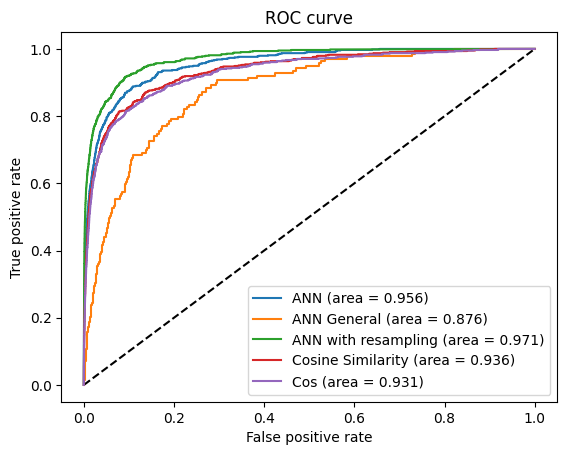

In [114]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='ANN (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_keras_ctx, tpr_keras_ctx, label='ANN General (area = {:.3f})'.format(auc_keras_ctx))
plt.plot(fpr_keras_resample, tpr_keras_resample, label='ANN with resampling (area = {:.3f})'.format(auc_keras_resample))
plt.plot(fpr_cos_sim, tpr_cos_sim, label='Cosine Similarity (area = {:.3f})'.format(auc_cos_sim))
plt.plot(fpr_cos, tpr_cos, label='Cos (area = {:.3f})'.format(auc_cos))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()